In [1]:
import pandas as pd

# Read the professors and reviews dataframes
professors_df = pd.read_csv('RateMyProfAnalysis/UMassReviews/professors.csv')
reviews_df = pd.read_csv('RateMyProfAnalysis/UMassReviews/reviews.csv')

print('Professors: \n', professors_df.head())

print('Reviews: \n', reviews_df.head())
print(reviews_df.info())
print(reviews_df.describe())
print('len(reviews_df): ', len(reviews_df))
print("\nUnique fields in reviews_df:")
for column in reviews_df.drop(columns=['tid']).columns:
    print(f"{column}: {reviews_df[column].unique()}")




Professors: 
         id                name   department  total_reviews_count  \
0   203815       John Bickford   Psychology                  449   
1    77120     Randall Phillis      Biology                  388   
2  1621419       Laura Francis      Biology                  370   
3   192549  Joanna Jeneralczuk  Mathematics                  323   
4  1617241      Chris McDaniel    Chemistry                  298   

   average_quality_rating  average_difficulty_rating  \
0                4.077951                   2.031180   
1                3.920103                   3.298969   
2                2.659459                   4.000000   
3                3.780186                   3.142415   
4                2.104027                   4.342282   

                                      classes_taught  
0  ['PSYCH100', 'PSYCH370', '100', 'PSCYH100', 'P...  
1  ['BIO151', '151', '100', 'BIOLOGY151', 'BIO484...  
2  ['161H', 'BIO151', '285', 'BIO285', '151', 'BI...  
3  ['STAT240', 'STAT


Statistics of unique values in reviews_df:

Value counts for qualityRating:
qualityRating
1     7166
2     5118
3     4998
4     8081
5    19811
Name: count, dtype: int64


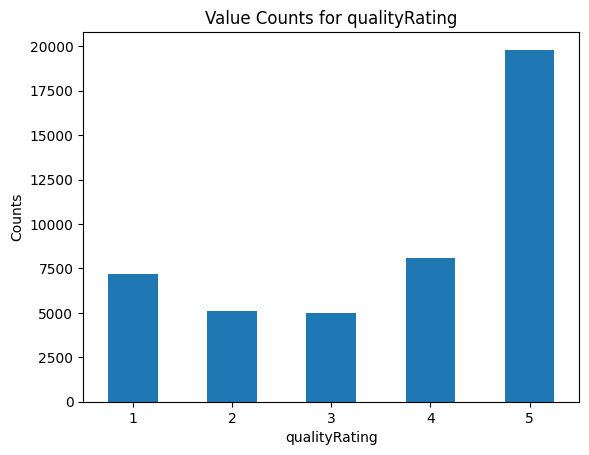


Value counts for difficultyRating:
difficultyRating
1     5952
2     9741
3    13303
4     9940
5     6238
Name: count, dtype: int64


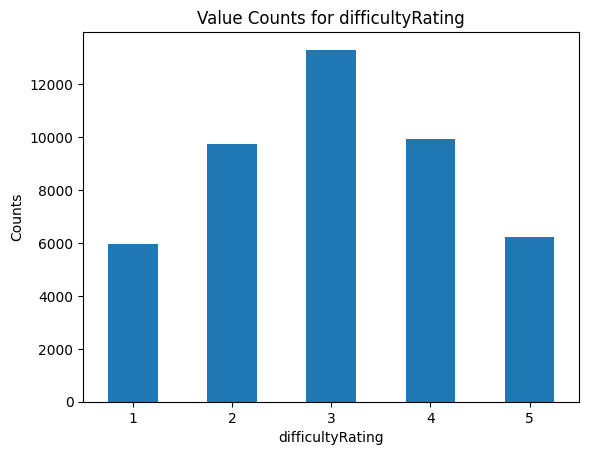


Value counts for isForCredit:
isForCredit
False    22370
True     22804
Name: count, dtype: int64


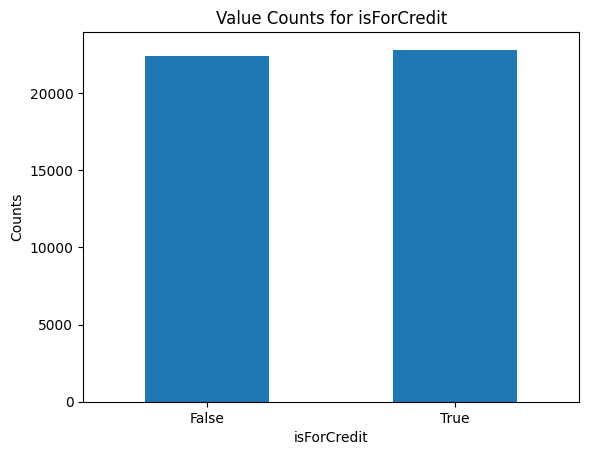


Value counts for wouldTakeAgain:
wouldTakeAgain
-1.0    29174
 0.0     3807
 1.0    12193
Name: count, dtype: int64


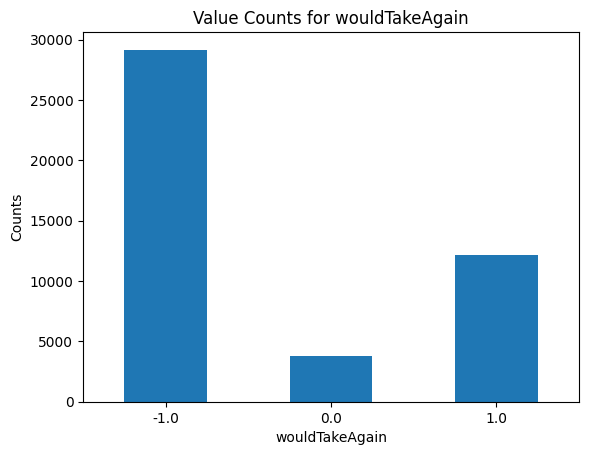

In [2]:
# Drop anything with majority of nulls, or anything that is not useful for sentiment analysis
columns_to_drop = ['createdByUser', 'textbookUse', 'attendanceMandatory']
reviews_df.drop(columns=[col for col in columns_to_drop if col in reviews_df.columns], inplace=True)
# CreatedByUser - not useful for sentiment analysis
# textbookUse - too many nulls
# attendanceMandatory - not useful and too many nulls

#fill the nulls with -1 for graphing purposes
reviews_df.fillna(-1, inplace=True) 

import matplotlib.pyplot as plt

print("\nStatistics of unique values in reviews_df:")
columns_to_check = ['qualityRating', 'difficultyRating', 'isForCredit', 'wouldTakeAgain'] 
for column in columns_to_check:
    unique_counts = reviews_df[column].value_counts().sort_index()  # Sort by index to ensure numerical order
    print(f"\nValue counts for {column}:\n{unique_counts}")
    
    # Plot as a bar graph
    unique_counts.plot(kind='bar', title=f'Value Counts for {column}')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.xticks(rotation=0)
    plt.show()



Overwhelmingly, the majority of the reviews are positive

Now let's deal with the classes taught by professors

In [3]:


print("\nclasses taught by the first 10 professors:")
# Ensure that the 'classes_taught' column is treated as a list
professors_df['classes_taught'] = professors_df['classes_taught'].apply(lambda x: eval(x) if isinstance(x, str) else x)
classes_taught = professors_df['classes_taught'].head(10).tolist()  # Convert to list for easier |logging
for class_array in classes_taught:
    print(class_array)  # Print each array on a new line

print(type(professors_df['classes_taught']))



classes taught by the first 10 professors:
['PSYCH100', 'PSYCH370', '100', 'PSCYH100', 'PERSONALITY', 'PSY370', 'PYSCH100', 'PSY360', 'PSYCH360', 'PSY100', 'PSYCH391', 'INTROTOPSYCH', 'PHSYC100', 'PSYCH391ZZ', 'PSYC370', 'PYSCH370', 'PSYCH380', 'PSYC100', 'PSYCH270', '370', '14437', 'PSYCH100360', 'PSYCH100370', 'SOCIALPSYCH', 'PSYCH101', 'PSYCH360370', 'PERS1', 'PSY1', 'PSYCHINTR', 'PSYCHOLOGY100', 'PSYCH355', 'PSYCHOLOGY370', 'PSYCTAP100', 'SOCPSYCH', 'PSYCH240']
['BIO151', '151', '100', 'BIOLOGY151', 'BIO484', '101', 'INTROBIO151', 'BIO105', 'BIO190H', 'BIOL190H', 'BIO597A', 'BIO101', 'BIO100', 'BIO197Q', 'BIOL100', 'BIOLOGY100', 'BIOLOGY', 'BIO', 'BIO283', 'ADVCELLB', 'BIO100L']
['161H', 'BIO151', '285', 'BIO285', '151', 'BIO191', 'BIO151285', 'BI285', '291AH', 'BIOC', 'BIOB', 'BIO161H', 'BIO161', 'BIO190H', 'BIO285H', 'LABBIO151H', 'BIOL100', 'BIO100', 'BIO152', 'BIO101', 'BIO2', 'BIOLAB', 'BIOBIO']
['STAT240', 'STAT501', 'STAT515', '240', 'STATS501', 'STATS240', 'STAT240ONLINE',

In [4]:
#Lets split these into bins so we can get a better idea of what errors there are
# Function to count classes based on the number of digits
def count_classes(classes_list):
    counts = {
        '0_numbers': 0,
        'less_than_3_numbers': 0,
        '3_numbers': 0,
        'more_than_3_numbers': 0
    }
    
    for classes in classes_list:
        # Read each class string independently
        for string in classes:
            num_count = sum(c.isdigit() for c in string)
            if num_count == 0:
                counts['0_numbers'] += 1
            elif num_count < 3:
                counts['less_than_3_numbers'] += 1
            elif num_count == 3:
                counts['3_numbers'] += 1
            else:
                counts['more_than_3_numbers'] += 1
    
    return counts

# Get the classes taught by professors as a list of lists
classes_taught = professors_df['classes_taught'].tolist()
print(len(classes_taught))

# Count the classes
class_counts = count_classes(classes_taught)

# Print the class counts for review
print("\nClass Counts: out of " + str(sum(class_counts.values())))
for category, count in class_counts.items():
    print(f"{category}: {count}")



1000

Class Counts: out of 10801
0_numbers: 1164
less_than_3_numbers: 251
3_numbers: 9033
more_than_3_numbers: 353


Number & Prefix Number are most likely the same thing - ex. MATH102 and 102
Prefix Number & Different Prefix Number are most likely the same thing - ex. PHYSC103 and PSY103 (Psychology)

Department names can be used to determine the department of the class and weed out possible classes

Anything with >3 numbers is most likely multiple classes, or put in incorrectly, so we can split by numbers and review them

From statistics, 9033 out of 10801 are most likely easily identifiable
The 1164 with 0 numbers are completely unidentifiable without looking into the actual name of courses from umass, but we will deal with this later.
With the ones with less than 3 numbers, we can see if any of them share all of their numbers with another singular class, and if so we can combine.
Finally for the ones with more than 3 numbers, we can split them into multiple classes and review them. - possibly a multiple of 3 can be split or maybe a 4 digit number was just an error


In [5]:
# Create a mapping dictionary to map classes to a common name based on their number, grouped by professor ID
class_mapping = {}

# Iterate through each professor's classes along with their IDs
for professor_id, classes in zip(professors_df['id'], classes_taught):
    for class_name in classes:
        # Extract the numeric part of the class name
        class_number = ''.join(filter(str.isdigit, class_name))
        if class_number and len(class_number) == 3:  # Only proceed if there is a number with exactly 3 digits
            if professor_id not in class_mapping:
                class_mapping[professor_id] = {}
            if class_number not in class_mapping[professor_id]:
                class_mapping[professor_id][class_number] = [class_name]  # Initialize with a list
            else:
                class_mapping[professor_id][class_number].append(class_name)  # Append to the existing list

# Print the mapping for review
print("\nClass Mapping by Professor ID:")
for professor_id, classes in class_mapping.items():
    print(f"Professor ID {professor_id}:")
    for number, names in classes.items():
        print(f"  {number}: {', '.join(names)}")  # Join the class names for display



Class Mapping by Professor ID:
Professor ID 203815:
  100: PSYCH100, 100, PSCYH100, PYSCH100, PSY100, PHSYC100, PSYC100, PSYCHOLOGY100, PSYCTAP100
  370: PSYCH370, PSY370, PSYC370, PYSCH370, 370, PSYCHOLOGY370
  360: PSY360, PSYCH360
  391: PSYCH391, PSYCH391ZZ
  380: PSYCH380
  270: PSYCH270
  101: PSYCH101
  355: PSYCH355
  240: PSYCH240
Professor ID 77120:
  151: BIO151, 151, BIOLOGY151, INTROBIO151
  100: 100, BIO100, BIOL100, BIOLOGY100, BIO100L
  484: BIO484
  101: 101, BIO101
  105: BIO105
  190: BIO190H, BIOL190H
  597: BIO597A
  197: BIO197Q
  283: BIO283
Professor ID 1621419:
  161: 161H, BIO161H, BIO161
  151: BIO151, 151, LABBIO151H
  285: 285, BIO285, BI285, BIO285H
  191: BIO191
  291: 291AH
  190: BIO190H
  100: BIOL100, BIO100
  152: BIO152
  101: BIO101
Professor ID 192549:
  240: STAT240, 240, STATS240, STAT240ONLINE, STATISTC240, MATH240, STATI240
  501: STAT501, STATS501
  515: STAT515, STATS515
  131: CALC131, MATH131
  101: ALS101
  597: STATS597S
  397: MATH397A

Overall, this does a good job of mapping classes into a bin. we have to deal with the other cases now. - SO WHY AND SOME EXAMPLES


In [6]:
def count_total_classes(class_mapping):
    #"""Count the total number of class names in the class_mapping."""
    total_objects = sum(len(name_list) for classes in class_mapping.values() for name_list in classes.values())
    print(f"Total objects in class_mapping: {total_objects}")

# Call the function to count total classes - we will use this periodically to see how many we have left.
count_total_classes(class_mapping)


# Extract classes with no numeric part
no_number_classes = []

for professor_id, classes in zip(professors_df['id'], classes_taught):
    for class_name in classes:
        if not any(char.isdigit() for char in class_name):  # Check if there are no digits in the class name
            no_number_classes.append((professor_id, class_name))

# It's very difficult to distinguish between these classes, so we will set them aside in a misc category
for professor_id, class_name in no_number_classes:
    if professor_id not in class_mapping:
        class_mapping[professor_id] = {}
    if 'misc' not in class_mapping[professor_id]:
        class_mapping[professor_id]['misc'] = []  # Initialize a list for miscellaneous classes
    class_mapping[professor_id]['misc'].append(class_name)  # Append to the list of miscellaneous classes

# Print the mapping for review
print("\nMiscellaneous Class Mapping by Professor ID:")
misc_classes = [(professor_id, ', '.join(classes['misc'])) for professor_id, classes in class_mapping.items() if 'misc' in classes]
for professor_id, class_names in misc_classes[:20]: 
    print(f"Professor ID {professor_id}: {class_names}") 

count_total_classes(class_mapping)



Total objects in class_mapping: 9033

Miscellaneous Class Mapping by Professor ID:
Professor ID 203815: PERSONALITY, INTROTOPSYCH, SOCIALPSYCH, PSYCHINTR, SOCPSYCH
Professor ID 77120: BIOLOGY, BIO, ADVCELLB
Professor ID 1621419: BIOC, BIOB, BIOLAB, BIOBIO
Professor ID 1617241: ORGOLAB
Professor ID 47704: COM, ALLALL, COMMSECT, COMM, ADVERTISING, MANY, SOC
Professor ID 887526: MATHSECT
Professor ID 837070: AA
Professor ID 752484: MATHB, MATH, AWSOME
Professor ID 385698: INTROTOPSYCH, PSYCHB, PSYCHA, INTROTOPYSCH, PSYCHOLOGY
Professor ID 287874: BIODIVERSITY, INTROECO, BIOLOGY
Professor ID 83019: MATHFORELEMEN
Professor ID 82675: INTROTOMICRO, MICROECON, ECOND, ECONC, ECONB, MICRO, MACRO, ECON, MICROECONOMICS, ECONOMICS
Professor ID 92488: STATINTR, STATSELEM, MATH, STATS
Professor ID 83082: ABNORMALPSY, PSYCHABN, ABNORMALPSYCH, ABNORMAL, PSYCH, ABNORMLPSY, ABNPSYCH, PSYCHOLOGY, ABPSY, ABNORMPSY
Professor ID 7541: CHEM
Professor ID 59327: ACCTGGRAD, ACCOUNTING, ACCTNGGRAD, ACCTNG
Profess

In [7]:
# Initialize counters for classes with 1 digit and 2 digits
class_count_1_digit = 0
class_count_2_digits = 0

# Lists to store examples of classes with 1 digit and 2 digits
examples_1_digit = []
examples_2_digits = []

# Iterate through each professor's classes along with their IDs
for professor_id, classes in zip(professors_df['id'], classes_taught):
    for class_name in classes:
        # Extract the numeric part of the class name
        class_number = ''.join(filter(str.isdigit, class_name))
        if class_number:
            if len(class_number) == 1:  # Count if there is a number with exactly 1 digit
                class_count_1_digit += 1  # Increment the 1-digit counter
                examples_1_digit.append(class_name)  # Store example class name
            elif len(class_number) == 2:  # Count if there is a number with exactly 2 digits
                class_count_2_digits += 1  # Increment the 2-digit counter
                examples_2_digits.append(class_name)  # Store example class name

# Print the total number of classes with 1 digit and 2 digits
print(f"Total number of classes with 1 digit: {class_count_1_digit}")
print(f"Total number of classes with 2 digits: {class_count_2_digits}")

# Print examples of classes with 1 digit and 2 digits
print(f"Examples of classes with 1 digit: {examples_1_digit[:5]}")  # Show up to 5 examples
print(f"Examples of classes with 2 digits: {examples_2_digits[:5]}")  # Show up to 5 examples

# Iterate through each professor's classes along with their IDs
handled_cases = []
for professor_id, classes in zip(professors_df['id'], classes_taught):
    for class_name in classes:
        # Extract the numeric part of the class name
        class_number = ''.join(filter(str.isdigit, class_name))
        if class_number and (len(class_number) == 1 or len(class_number) == 2):  # Only proceed if there is a number with exactly 1 or 2 digits
            # Check if the professor_id exists in class_mapping to avoid KeyError
            if professor_id not in class_mapping:
                class_mapping[professor_id] = {'misc': []}  # Initialize mapping with a misc column
            # Now check the keys. If there is only one key that contains all the numbers, then we can map it to that key
            keys = class_mapping[professor_id].keys()
            affirmed_key_list = [key for key in keys if all(digit in key for digit in class_number)]
            if len(affirmed_key_list) == 1 and len(class_number) == 2:  # Changed '&' to 'and'
                class_mapping[professor_id][affirmed_key_list[0]].append(class_name)
                handled_cases.append(class_name)
            else:
                # If there is not a single key that contains all the numbers, then we can map it to misc
                if 'misc' not in class_mapping[professor_id]:
                    class_mapping[professor_id]['misc'] = []
                class_mapping[professor_id]['misc'].append(class_name)  # Removed redundant check for 'misc'

print(f"Handled cases: {handled_cases}")
print(count_total_classes(class_mapping))


Total number of classes with 1 digit: 134
Total number of classes with 2 digits: 117
Examples of classes with 1 digit: ['PERS1', 'PSY1', 'BIO2', 'MATH1', 'BIO1']
Examples of classes with 2 digits: ['COMM01', 'MATH01', 'MATHL02', 'AABBA01', 'PSYCH00']
Handled cases: ['COMM01', 'MATHL02', 'MATH01', 'HTM01', 'EXERSCI13', 'GEO1O2', 'SOC22', 'MICROBIO14OP', 'BAND01', 'POLISCI35', 'A01', 'SPTMGT21', 'JAPAN01', 'COMPLIT65', 'BIOCHEM10', 'ARTHIST53', 'ARTHIST19', 'PHYSGEO01', 'ARTHIST53', 'THEATER36', 'THEATR36', 'STATS24P', 'CS68', 'GEO01', 'HIST52', 'ECE63', 'JDCS02', 'ENG47', 'ORIGINS45', 'HUMANDEV27', 'HON39', 'HISTORY14', 'PHY01', 'THEATER36', 'HUMANDEV70', 'PHILOS63', 'CONSTIT69', 'MGMT25']
Total objects in class_mapping: 10448
None


In [8]:
# Initialize counter for classes with more than 3 digits
class_count_3_digits = 0

# List to store examples of classes with more than 3 digits
examples_3_digits = []
handled_cases = []

# Iterate through each professor's classes along with their IDs
for professor_id, classes in zip(professors_df['id'], classes_taught):
    for class_name in classes:
        # Extract the numeric part of the class name
        class_number = ''.join(filter(str.isdigit, class_name))
        if class_number and len(class_number) > 3:  # Check for classes with more than 3 digits
            class_count_3_digits += 1  # Increment the counter
            examples_3_digits.append(class_name)  # Store example class name

# Print the total number of classes with more than 3 digits
print(f"Total number of classes with more than 3 digits: {class_count_3_digits}")

# Print examples of classes with more than 3 digits
print(f"Examples of classes with more than 3 digits: {examples_3_digits[:10]}")  # Show up to 5 examples

left = class_count_3_digits #keep in mind, we will assign multiple here, so we need to account for that - we have 353 left
for professor_id, classes in zip(professors_df['id'], classes_taught):
    for class_name in classes:
        # Extract the numeric part of the class name
        class_number = ''.join(filter(str.isdigit, class_name))
        if class_number and len(class_number) % 3 == 0 and len(class_number) > 3:  # Only proceed if the length of the class number is divisible by 3
            #if its divisible by 3, then most likely its multiple course codes, so we can split it up

            left -= 1
            if class_name in examples_3_digits:
                examples_3_digits.remove(class_name)  # Remove the original string from examples_3_digits
                handled_cases.append(class_name)

            class_numbers = [class_number[i:i+3] for i in range(0, len(class_number), 3)]
            # Check if the professor_id exists in class_mapping to avoid KeyError
            if professor_id not in class_mapping:
                class_mapping[professor_id] = {'misc': []}  # Initialize mapping with a misc column
            
            if all(class_number in class_mapping[professor_id] for class_number in class_numbers):
                for class_number in class_numbers:
                    class_mapping[professor_id][class_number].append(class_name)
            else:
                if 'misc' not in class_mapping[professor_id]:
                    class_mapping[professor_id]['misc'] = []
                class_mapping[professor_id]['misc'].append(class_name)
        
                if 'misc' not in class_mapping[professor_id]:
                    class_mapping[professor_id]['misc'] = []
                class_mapping[professor_id]['misc'].append(class_name)  # Removed redundant check for 'misc'

                
            if 'misc' not in class_mapping[professor_id]:
                class_mapping[professor_id]['misc'] = []
            class_mapping[professor_id]['misc'].append(class_name)

print(f'there are {left} not handled as multiple classes, and were mapped to misc')
print('examples of them:', examples_3_digits[:10])
print('examples of handled classes', handled_cases[:10])


Total number of classes with more than 3 digits: 353
Examples of classes with more than 3 digits: ['14437', 'PSYCH100360', 'PSYCH100370', 'PSYCH360370', 'BIO151285', '20848SOCIOL212', 'STAT240501', 'CHEM261CHEM269', 'CHEM261CHEM262C', 'CHEM261262']
there are 159 not handled as multiple classes, and were mapped to misc
examples of them: ['14437', '20848SOCIOL212', 'COMM2987', 'COMM8788', 'COMM1212', 'MATH1104', 'MATH3920', 'MATH1043', '50888', 'ECON1003']
examples of handled classes ['PSYCH100360', 'PSYCH100370', 'PSYCH360370', 'BIO151285', 'STAT240501', 'CHEM261CHEM269', 'CHEM261CHEM262C', 'CHEM261262', 'CHEM265AND266', '287387ONLINE']


In [9]:
#Check all possible classes in reviews - make sure they have a mapping. If they dont, append them to the misc of their tid
for professor_id in professors_df['id'].unique():
    if professor_id not in class_mapping:
        class_mapping[professor_id] = {'misc': []}  # Initialize mapping with a misc column
        
# Check distribution of classes - how many in class_mapping[id]['misc']?
misc_counts = {professor_id: len(class_mapping[professor_id].get('misc', [])) for professor_id in class_mapping}
sums = 0
print("Distribution of classes in 'misc':")
for professor_id, count in misc_counts.items():
    print(f"Professor ID {professor_id}: {count} classes in 'misc'")
    sums += count

print(f'total classes in misc: {sums} which is {sums/len(class_mapping)} classes per professor or {100*sums/sum(class_counts.values())}% of all classes')


Distribution of classes in 'misc':
Professor ID 203815: 10 classes in 'misc'
Professor ID 77120: 3 classes in 'misc'
Professor ID 1621419: 6 classes in 'misc'
Professor ID 192549: 1 classes in 'misc'
Professor ID 1617241: 5 classes in 'misc'
Professor ID 47704: 15 classes in 'misc'
Professor ID 887526: 7 classes in 'misc'
Professor ID 837070: 1 classes in 'misc'
Professor ID 1918813: 1 classes in 'misc'
Professor ID 2385263: 0 classes in 'misc'
Professor ID 752484: 4 classes in 'misc'
Professor ID 385698: 6 classes in 'misc'
Professor ID 287874: 6 classes in 'misc'
Professor ID 83019: 2 classes in 'misc'
Professor ID 82675: 12 classes in 'misc'
Professor ID 92488: 4 classes in 'misc'
Professor ID 83082: 10 classes in 'misc'
Professor ID 7541: 2 classes in 'misc'
Professor ID 1847647: 1 classes in 'misc'
Professor ID 2118960: 0 classes in 'misc'
Professor ID 1661417: 1 classes in 'misc'
Professor ID 59327: 7 classes in 'misc'
Professor ID 1412623: 1 classes in 'misc'
Professor ID 227364

In [10]:
#Lets now look at departments, so we can think about how to display the newly aquired classes.
for k, value in class_mapping.items():
    for classes, arr in value.items():
        class_mapping[k][classes] = {'prefix': '', 'suffix':'', 'labels': arr}

# Print a few items in the class_mapping dictionary
print("Sample items from class_mapping:")
for professor_id, classes in list(class_mapping.items())[:2]:  # Print first 2 entries
    print(f"Professor ID: {professor_id}, Classes: {classes}")

from collections import Counter
import random

#We are going to assume that the most occuring prefix for a class in reviews is the right course label. 
#  If two or more match for the same amount of occurences - check if its over 3 times for each - 
#    if it is, pick randomly, if not, put the department name of the professor as the label

from itertools import takewhile


for professor_id, classes in class_mapping.items():
    reviews = reviews_df[reviews_df['tid'] == professor_id]
    class_label_count = {}
    for _, review in reviews.iterrows():
        if (review['class'] not in class_label_count):
            class_label_count[review['class']] = 0
        class_label_count[review['class']] += 1
        
    for class_number, details in classes.items():
        if (class_number != 'misc'):
            most_common = []
            max = 0
            for label in details['labels']:
                if (class_label_count[label] > max):
                    max = class_label_count[label]
                    most_common = [label]
                elif (class_label_count[label] == max):
                    most_common.append(label)

            if (len(most_common) == 1 or max > 2):
                index = 0
                if (max > 2):
                    index = random_index = random.randint(0, len(most_common) - 1)
                details['prefix'] = ''.join(takewhile(lambda x: not x.isdigit(), most_common[index]))
                details['suffix'] = ''.join(takewhile(lambda x: not x.isdigit(), most_common[index][::-1])) #reverses, then looks
            else:
                details['prefix'] = professors_df.loc[professors_df['id'] == professor_id, 'department'].values[0]




Sample items from class_mapping:
Professor ID: 203815, Classes: {'100': {'prefix': '', 'suffix': '', 'labels': ['PSYCH100', '100', 'PSCYH100', 'PYSCH100', 'PSY100', 'PHSYC100', 'PSYC100', 'PSYCHOLOGY100', 'PSYCTAP100', 'PSYCH100360', 'PSYCH100370']}, '370': {'prefix': '', 'suffix': '', 'labels': ['PSYCH370', 'PSY370', 'PSYC370', 'PYSCH370', '370', 'PSYCHOLOGY370', 'PSYCH100370', 'PSYCH360370']}, '360': {'prefix': '', 'suffix': '', 'labels': ['PSY360', 'PSYCH360', 'PSYCH100360', 'PSYCH360370']}, '391': {'prefix': '', 'suffix': '', 'labels': ['PSYCH391', 'PSYCH391ZZ']}, '380': {'prefix': '', 'suffix': '', 'labels': ['PSYCH380']}, '270': {'prefix': '', 'suffix': '', 'labels': ['PSYCH270']}, '101': {'prefix': '', 'suffix': '', 'labels': ['PSYCH101']}, '355': {'prefix': '', 'suffix': '', 'labels': ['PSYCH355']}, '240': {'prefix': '', 'suffix': '', 'labels': ['PSYCH240']}, 'misc': {'prefix': '', 'suffix': '', 'labels': ['PERSONALITY', 'INTROTOPSYCH', 'SOCIALPSYCH', 'PSYCHINTR', 'SOCPSYCH', '

In [11]:
print("Sample items from class_mapping:")
for professor_id, classes in list(class_mapping.items())[:10]:  # Print first 2 entries
    print(f"Professor ID: {professor_id}, Classes: {classes}")

import json

# Save class_mapping as a JSON file
with open('RateMyProfAnalysis/UMassReviews/class_mapping.json', 'w') as json_file:
    json.dump(class_mapping, json_file)


Sample items from class_mapping:
Professor ID: 203815, Classes: {'100': {'prefix': 'PSYCH', 'suffix': '', 'labels': ['PSYCH100', '100', 'PSCYH100', 'PYSCH100', 'PSY100', 'PHSYC100', 'PSYC100', 'PSYCHOLOGY100', 'PSYCTAP100', 'PSYCH100360', 'PSYCH100370']}, '370': {'prefix': 'PSYCH', 'suffix': '', 'labels': ['PSYCH370', 'PSY370', 'PSYC370', 'PYSCH370', '370', 'PSYCHOLOGY370', 'PSYCH100370', 'PSYCH360370']}, '360': {'prefix': 'PSYCH', 'suffix': '', 'labels': ['PSY360', 'PSYCH360', 'PSYCH100360', 'PSYCH360370']}, '391': {'prefix': 'PSYCH', 'suffix': 'ZZ', 'labels': ['PSYCH391', 'PSYCH391ZZ']}, '380': {'prefix': 'PSYCH', 'suffix': '', 'labels': ['PSYCH380']}, '270': {'prefix': 'PSYCH', 'suffix': '', 'labels': ['PSYCH270']}, '101': {'prefix': 'PSYCH', 'suffix': '', 'labels': ['PSYCH101']}, '355': {'prefix': 'PSYCH', 'suffix': '', 'labels': ['PSYCH355']}, '240': {'prefix': 'PSYCH', 'suffix': '', 'labels': ['PSYCH240']}, 'misc': {'prefix': '', 'suffix': '', 'labels': ['PERSONALITY', 'INTROTOPS

In [12]:
import logging
from collections import defaultdict

# Set up logging
logging.basicConfig(filename='RateMyProfAnalysis/UMassReviews/class_mapping.log', level=logging.INFO)
edge_cases = defaultdict(list)

for professor_id, classes in class_mapping.items():
    reviews = reviews_df[reviews_df['tid'] == professor_id]
    class_label_count = {}
    
    # Log professors with unusually high/low number of classes
    if len(classes) > 20:  # Arbitrary threshold
        logging.warning(f"Professor {professor_id} has {len(classes)} classes")
        edge_cases['high_class_count'].append(professor_id)
    
    for class_number, details in classes.items():
        if class_number != 'misc':
            # Log unusual class numbers
            if not class_number.isdigit() or len(class_number) != 3:
                logging.warning(f"Unusual class number format: {class_number} for professor {professor_id}")
                edge_cases['unusual_class_number'].append((professor_id, class_number))
            
            # Log classes with conflicting labels
            if len(details['labels']) > 5:  # Arbitrary threshold
                logging.warning(f"Many different labels ({len(details['labels'])}) for class {professor_id}-{class_number}")
                edge_cases['multiple_labels'].append((professor_id, class_number))
            
            # Validate prefix/suffix extraction
            most_common = [label for label in details['labels'] if label in class_label_count]  # Ensure most_common is defined
            if most_common:  # Check if most_common is not empty
                index = 0
                if len(most_common) > 1 and max(class_label_count[label] for label in most_common) > 2:
                    index = random.randint(0, len(most_common) - 1)
                prefix = ''.join(takewhile(lambda x: not x.isdigit(), most_common[index]))
                if not prefix.isalpha():
                    logging.warning(f"Non-alphabetic prefix: {prefix} for class {class_number}")
                    edge_cases['invalid_prefix'].append((professor_id, class_number, prefix))

# Summary report
print("\nEdge Case Summary:")
for case_type, instances in edge_cases.items():
    print(f"\n{case_type}: {len(instances)} instances")
    print("Examples:", instances[:3])


Edge Case Summary:

multiple_labels: 214 instances
Examples: [(203815, '100'), (203815, '370'), (192549, '240')]


unidentified classes: 203


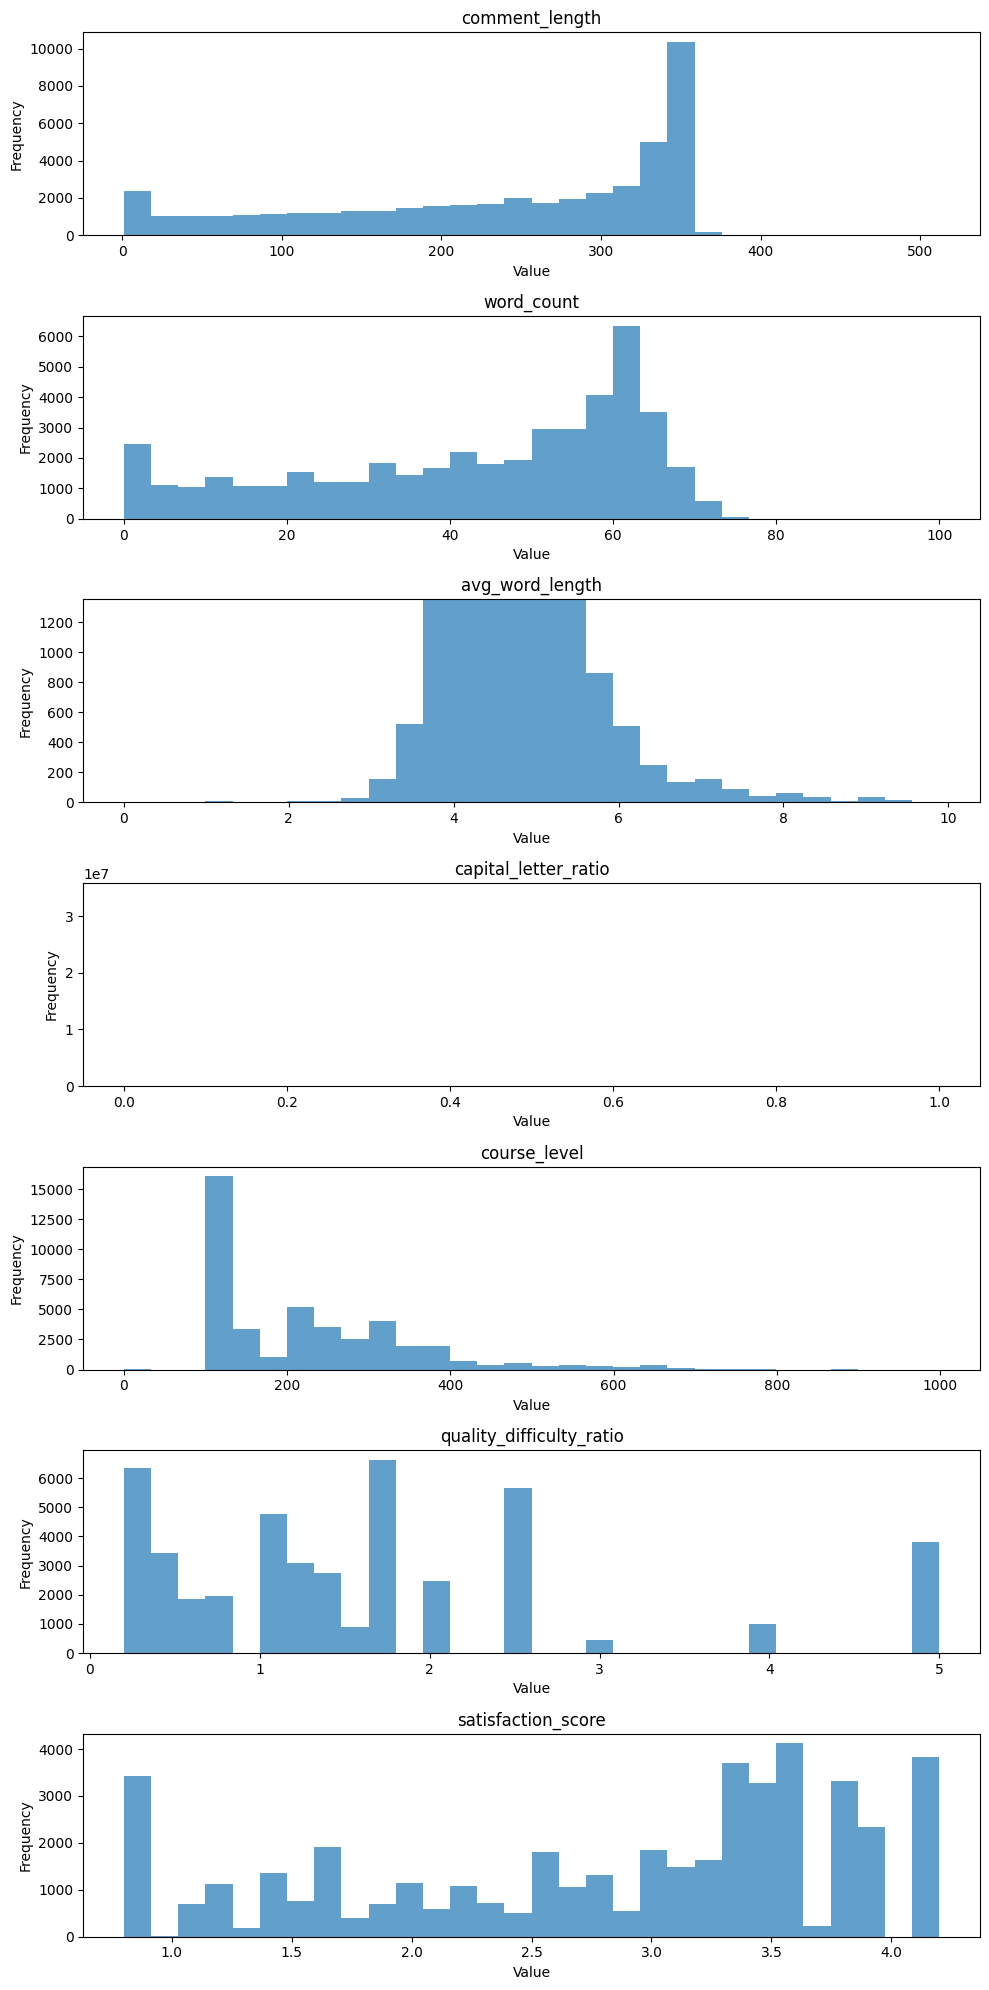

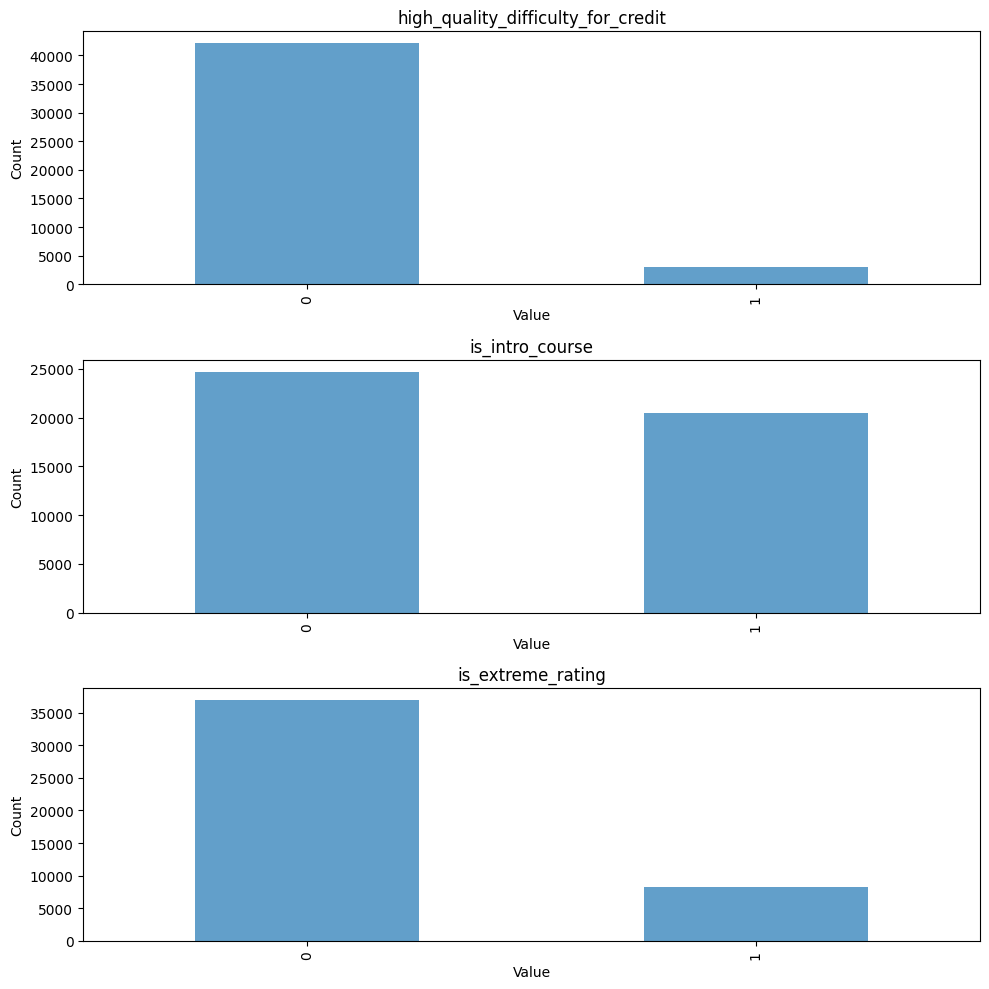

In [13]:
# Feature Engineering
import numpy as np

# Add group identifier
reviews_df['class_identifiers'] = [[] for _ in range(len(reviews_df))]  # Initialize the field for all reviews
for index, review in reviews_df.iterrows():
    for class_key, details in class_mapping[review['tid']].items():
        if review['class'] in details['labels']:
            reviews_df.at[index, 'class_identifiers'].append(
                {'key': str(review['tid']) + '-' + class_key, 'name': details['prefix'] + class_key + details['suffix']}
            )  # class identifier

# Ensure none of the classes have an empty list of class_identifiers
zero_length_identifiers = reviews_df['class_identifiers'].map(len) == 0
print('unidentified classes:', len(reviews_df[zero_length_identifiers]))  # Print the amount of rows where class_identifiers length is 0

# Core and quality class
reviews_df['high_quality_difficulty_for_credit'] = (
    (reviews_df['isForCredit'] == 1) & 
    (reviews_df['qualityRating'] >= 4) & 
    (reviews_df['difficultyRating'] >= 4)
).astype(int)

# Comment length and complexity
reviews_df['comment_length'] = reviews_df['comment'].str.len()
reviews_df['word_count'] = reviews_df['comment'].str.split().str.len()

# Handle potential empty comments to avoid warnings
reviews_df['avg_word_length'] = reviews_df['comment'].apply(
    lambda x: np.mean([len(word) for word in str(x).split()]) if str(x).strip() else 0
)
reviews_df['capital_letter_ratio'] = reviews_df['comment'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0
)

# Extract course level (100, 200, 300, etc.)
reviews_df['course_level'] = reviews_df['class'].str.extract(r'(\d{3})').astype(float)  # Use raw string to avoid escape sequence warning
reviews_df['is_intro_course'] = reviews_df['course_level'].between(100, 199).astype(int)

# Quality vs Difficulty ratios
reviews_df['quality_difficulty_ratio'] = reviews_df['qualityRating'] / reviews_df['difficultyRating'].replace(0, np.nan)

# Extreme ratings
reviews_df['is_extreme_rating'] = ((reviews_df['qualityRating'].isin([1, 5])) & 
                                 (reviews_df['difficultyRating'].isin([1, 5]))).astype(int)

# Overall satisfaction score (weighted combination)
reviews_df['satisfaction_score'] = (
    0.5 * reviews_df['qualityRating'] + 
    0.3 * (6 - reviews_df['difficultyRating'].replace(0, np.nan)) +  # Invert difficulty scale
    0.2 * reviews_df['wouldTakeAgain'].replace(-1, 0.5)
)

import matplotlib.pyplot as plt

# Plotting the new features
features_to_plot = [
    'comment_length',  
    'word_count', 
    'avg_word_length', 
    'capital_letter_ratio',  
    'course_level',  
    'quality_difficulty_ratio', 
    'satisfaction_score'
]

binary_features = ['high_quality_difficulty_for_credit', 'is_intro_course', 'is_extreme_rating']

# Create subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 20))

# Remove outliers for avg_word_length
avg_word_length_mean = reviews_df['avg_word_length'].mean()
avg_word_length_std = reviews_df['avg_word_length'].std()
lower_bound = avg_word_length_mean - 3 * avg_word_length_std
upper_bound = avg_word_length_mean + 3 * avg_word_length_std

# Filter out outliers
filtered_reviews_df = reviews_df[(reviews_df['avg_word_length'] >= lower_bound) & 
                                  (reviews_df['avg_word_length'] <= upper_bound)]

# Define scaling for axes
scaling_factors = {
    'avg_word_length': 0.1,  # Adjusted scaling factor for avg_word_length
    'capital_letter_ratio': 1000,  # Adjusted scaling factor for capital_letter_ratio to avoid excessive scaling
}

# Plot each feature with appropriate axis scaling
for ax, feature in zip(axes, features_to_plot):
    filtered_reviews_df[feature].plot(kind='hist', ax=ax, bins=30, alpha=0.7)
    
    # Scale the y-axis for specific features
    if feature in scaling_factors:
        ax.set_ylim(0, ax.get_ylim()[1] * scaling_factors[feature])
    
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create subplots for binary features
fig_binary, axes_binary = plt.subplots(nrows=len(binary_features), ncols=1, figsize=(10, 10))

# Plot each binary feature
for ax, feature in zip(axes_binary, binary_features):
    reviews_df[feature].value_counts().plot(kind='bar', ax=ax, alpha=0.7)
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()



In [14]:
# Display some examples of the reviews DataFrame
print(reviews_df.sample(5))  # Print 5 random samples from the reviews DataFrame

          class                                            comment  \
28891   HIST116  Great Professor, very interesting and willing ...   
36036    HTM344  Erin is a nice person but not a great teacher....   
27362  Math-233  He is the most irresponsible professor, doesn'...   
17050    AST101  The test were very hard, and most people didn'...   
9055     HTM100  Such an easy class. powerpoints are posted onl...   

                                date  difficultyRating  isForCredit  \
28891  2004-11-15 23:45:11 +0000 UTC                 4        False   
36036  2019-12-05 16:44:01 +0000 UTC                 3         True   
27362  2022-12-17 00:17:05 +0000 UTC                 5         True   
17050  2022-08-26 22:14:58 +0000 UTC                 2         True   
9055   2017-12-11 22:31:59 +0000 UTC                 2         True   

       qualityRating  wouldTakeAgain      tid  \
28891              5            -1.0    83275   
36036              2             0.0  1069447   
27362

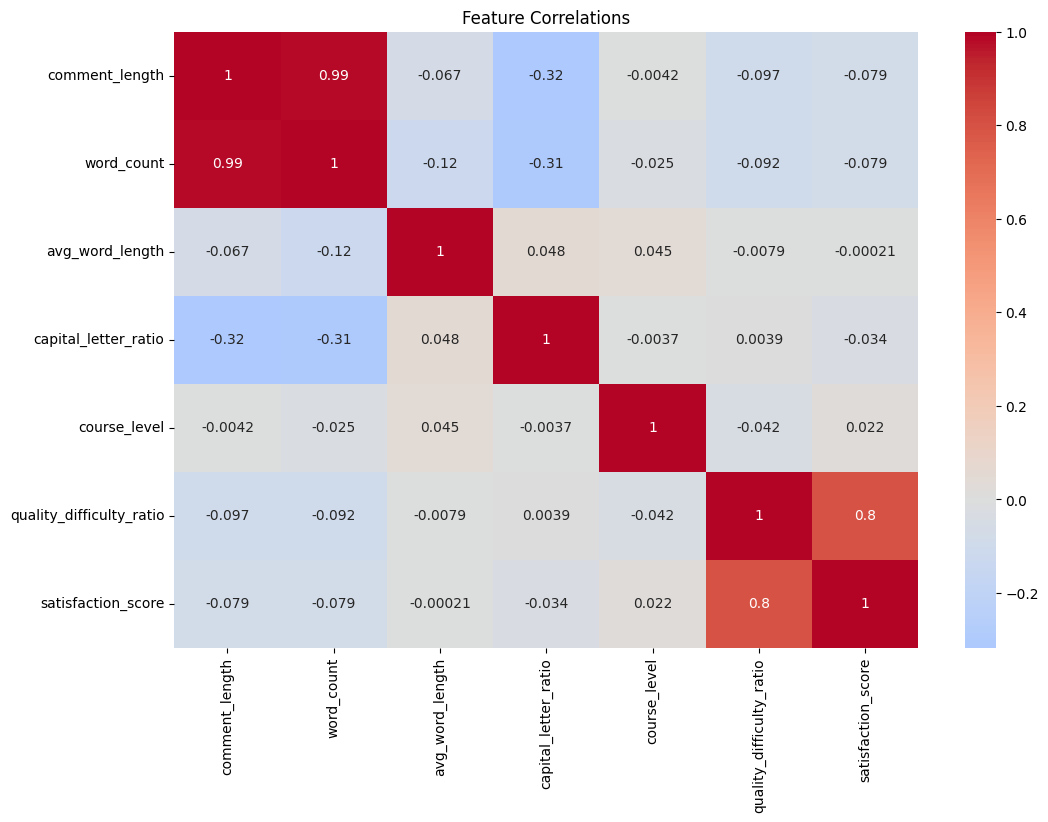

In [15]:
import seaborn as sns
# Create correlation matrix
correlation_matrix = reviews_df[features_to_plot].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.show()

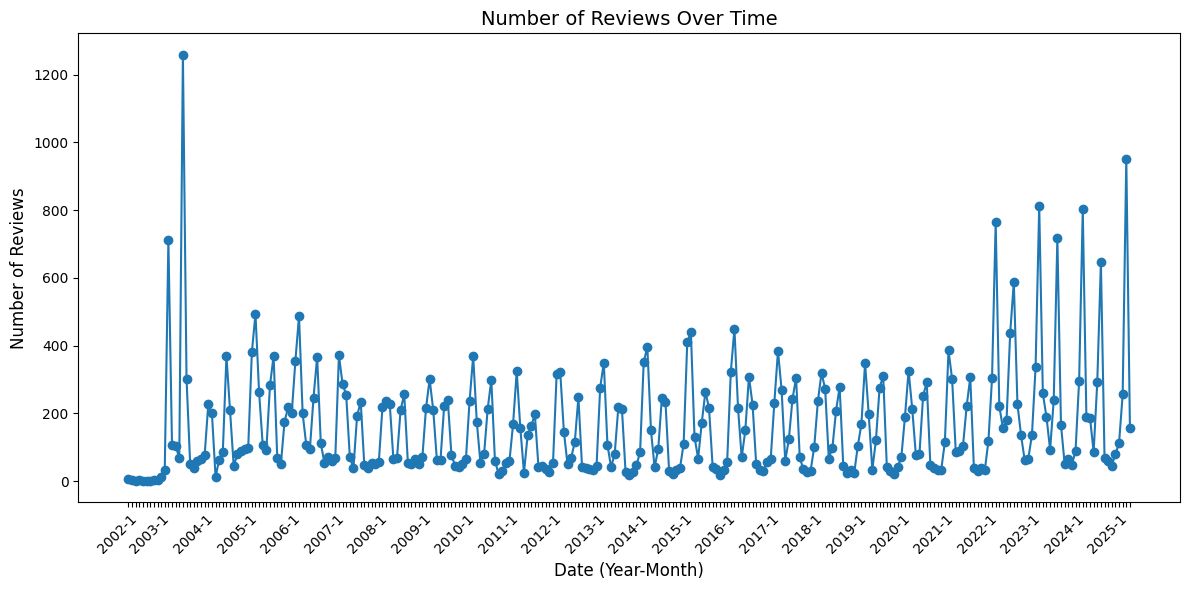

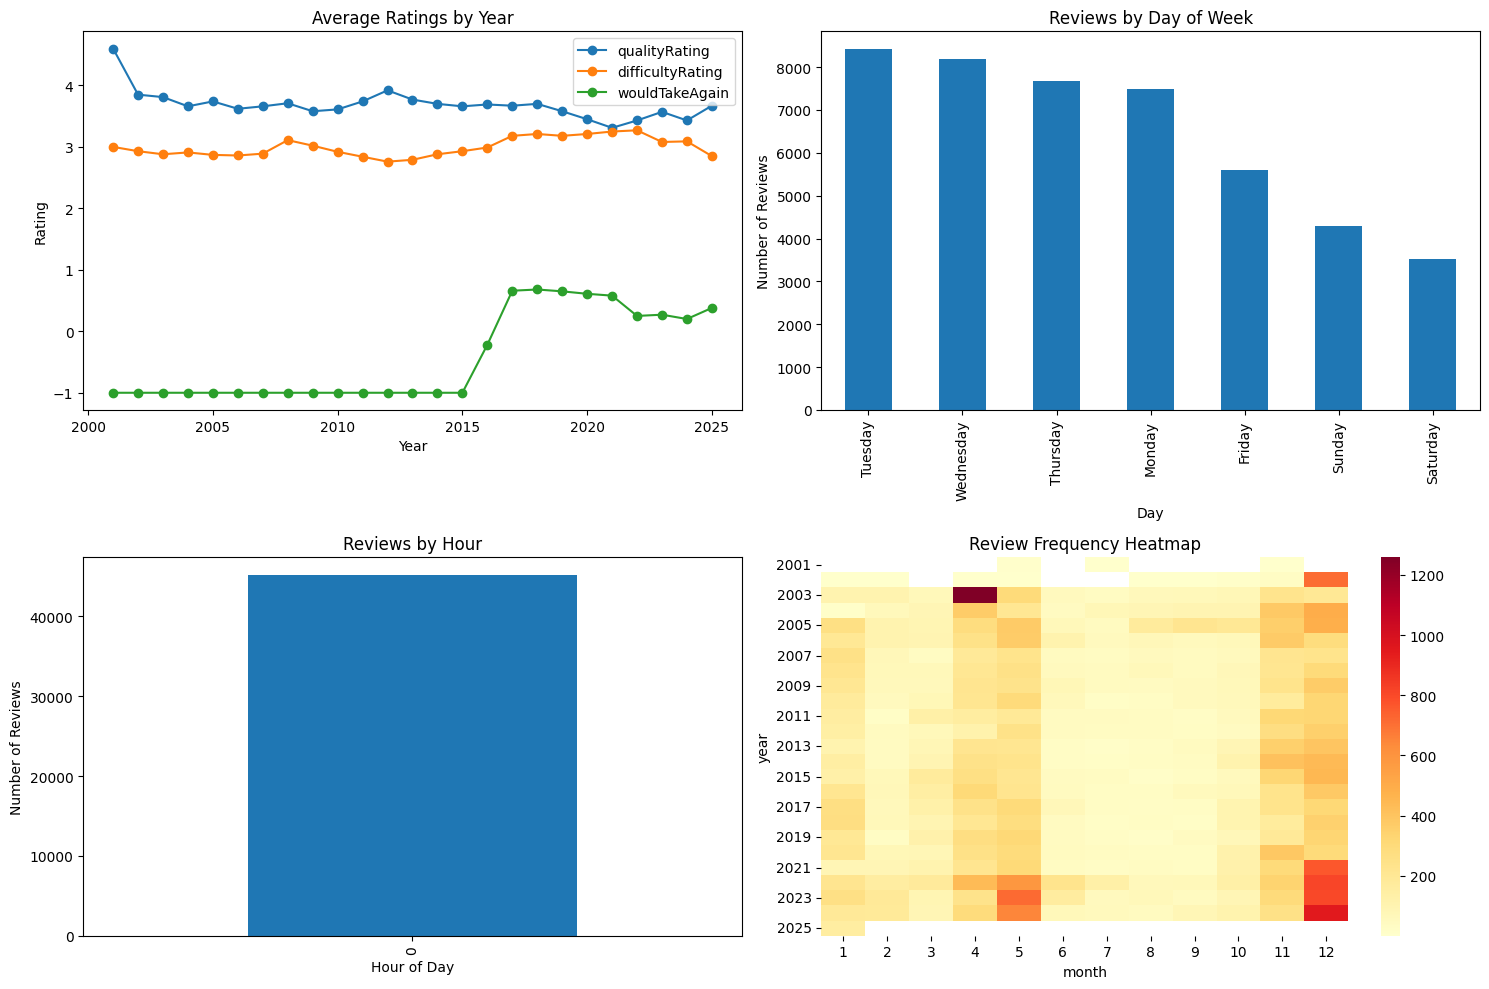

In [16]:

# Convert the 'date' column to datetime format
reviews_df['date'] = pd.to_datetime(reviews_df['date'].astype(str).str[:10], format='%Y-%m-%d', errors='coerce')

# Extract year, month, and day from the date column
reviews_df['year'] = reviews_df['date'].dt.year
reviews_df['month'] = reviews_df['date'].dt.month
reviews_df['day'] = reviews_df['date'].dt.day

# Group by year and month to analyze the number of reviews over time
time_based_analysis = reviews_df.groupby(['year', 'month']).size().reset_index(name='review_count')

# Plotting the time-based analysis with improved label readability
plt.figure(figsize=(12, 6))
plt.plot(time_based_analysis['year'].astype(str) + '-' + time_based_analysis['month'].astype(str), 
         time_based_analysis['review_count'], marker='o')
plt.xticks(ticks=range(len(time_based_analysis)), 
           labels=[f"{year}-{month}" if month == 1 else "" for year, month in zip(time_based_analysis['year'], time_based_analysis['month'])], 
           rotation=45, ha='right', fontsize=10)  # Show labels only for January of each year
plt.title('Number of Reviews Over Time', fontsize=14)
plt.xlabel('Date (Year-Month)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.tight_layout()
plt.show()

# Additional time-based analyses you might want:
# 1. Average ratings by year
yearly_ratings = reviews_df.groupby('year').agg({
    'qualityRating': 'mean',
    'difficultyRating': 'mean',
    'wouldTakeAgain': 'mean'
}).round(2)

# 2. Reviews by day of week
reviews_df['day_of_week'] = reviews_df['date'].dt.day_name()
dow_counts = reviews_df['day_of_week'].value_counts()

# Check if dow_counts is empty before plotting
if not dow_counts.empty:
    # 3. Reviews by hour (might show when students typically write reviews)
    reviews_df['hour'] = reviews_df['date'].dt.hour
    hour_counts = reviews_df['hour'].value_counts().sort_index()

    # Visualize these additional analyses
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot yearly ratings
    yearly_ratings.plot(marker='o', ax=axes[0,0])
    axes[0,0].set_title('Average Ratings by Year')
    axes[0,0].set_xlabel('Year')
    axes[0,0].set_ylabel('Rating')

    # Plot day of week distribution
    dow_counts.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Reviews by Day of Week')
    axes[0,1].set_xlabel('Day')
    axes[0,1].set_ylabel('Number of Reviews')

    # Plot hour distribution
    hour_counts.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Reviews by Hour')
    axes[1,0].set_xlabel('Hour of Day')
    axes[1,0].set_ylabel('Number of Reviews')

    # Maybe a heatmap of reviews by month/year
    pivot_data = reviews_df.pivot_table(
        values='qualityRating', 
        index='year',
        columns='month',
        aggfunc='count'
    )
    sns.heatmap(pivot_data, ax=axes[1,1], cmap='YlOrRd')
    axes[1,1].set_title('Review Frequency Heatmap')

    plt.tight_layout()
    plt.show()
else:
    print("No reviews available for day of week analysis.")

In [27]:
#add each class mapping for cleaner use later
for index, row in professors_df.iterrows():
    prof_id = row['id']
    if prof_id in class_mapping:
        professors_df.at[index, 'class_map'] = class_mapping[prof_id]

print(professors_df.head())

# Save the DataFrames to CSV files
professors_df.to_csv('RateMyProfAnalysis/UMassReviews/professors_df_clean.csv', index=False)
reviews_df.to_csv('RateMyProfAnalysis/UMassReviews/reviews_df_clean.csv', index=False)


        id                name   department  total_reviews_count  \
0   203815       John Bickford   Psychology                  449   
1    77120     Randall Phillis      Biology                  388   
2  1621419       Laura Francis      Biology                  370   
3   192549  Joanna Jeneralczuk  Mathematics                  323   
4  1617241      Chris McDaniel    Chemistry                  298   

   average_quality_rating  average_difficulty_rating  \
0                4.077951                   2.031180   
1                3.920103                   3.298969   
2                2.659459                   4.000000   
3                3.780186                   3.142415   
4                2.104027                   4.342282   

                                      classes_taught  \
0  [PSYCH100, PSYCH370, 100, PSCYH100, PERSONALIT...   
1  [BIO151, 151, 100, BIOLOGY151, BIO484, 101, IN...   
2  [161H, BIO151, 285, BIO285, 151, BIO191, BIO15...   
3  [STAT240, STAT501, STAT515,